011010000110010101101100011011000110111101110100011010000110100101110011011010010111001101100001011000100110010101100001011101010111010001101001011001100111010101101100011101110110111101110010011011000110010001101000011011110111000001100101


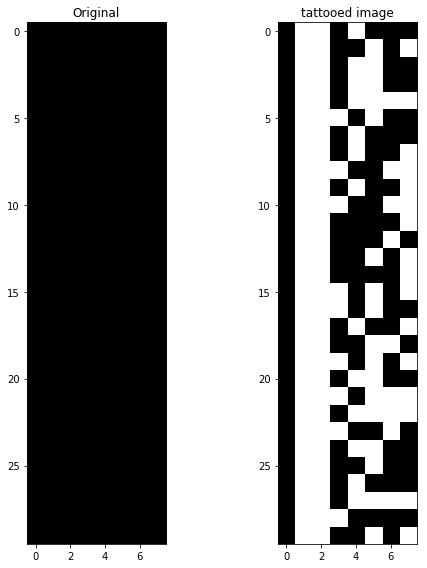

011010000110010101101100011011000110111101110100011010000110100101110011011010010111001101100001011000100110010101100001011101010111010001101001011001100111010101101100011101110110111101110010011011000110010001101000011011110111000001100101
hellothisisabeautifulworldhope


In [152]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import bitarray
from random import randint
from skimage import data
from skimage.color import rgb2gray


def image_display():
    img=data.astronaut()
    grayscale = rgb2gray(img)
    grayscale=(grayscale*255).astype(np.int)
    #plt.imshow(grayscale)
    #plt.show()    
    return grayscale
    

def convertStringBits(marque):
    ba = bitarray.bitarray()    
    ba.frombytes(marque.encode('utf-8'))
    p=str(ba)
    ba=p[10:len(p)-2]
    return ba
    

#return new image, position height and position width
def randomChoice(marque,image):
    
    l=len(marque)
    line=image.shape[0]
    col=image.shape[1]
    val1=randint(0,line-l)
    val2=randint(0,col-8)
    newimg=image[val1:val1+l,val2:val2+8]
    return newimg,val1,val2
    #plt.imshow(newimg)
    #plt.show()    

def tattoo(mrq,zone):
    k=-1
    newzone=np.zeros((zone.shape[0],zone.shape[1]),dtype=int)
    print(mrq)
    for i in range(zone.shape[0]):
        for j in range(zone.shape[1]):
            newzone[i,j]='{0:08b}'.format(zone[i,j])
            t=str(newzone[i,j])
            t=t[0:7]
            k=k+1
            t=t+mrq[k] 
            newzone[i,j]= int(t,2)
            

    fig, axes = plt.subplots(1, 2, figsize=(8, 8))
    ax = axes.ravel()
    ax[0].imshow(zone, cmap=plt.cm.gray)
    ax[0].set_title("Original")
    ax[1].imshow(newzone, cmap=plt.cm.gray)
    ax[1].set_title("tattooed image")
    fig.tight_layout()
    plt.show() 
    #print(newzone)
    return newzone 

def bits2a(b):
    return ''.join(chr(int(''.join(x), 2)) for x in zip(*[iter(b)]*8))
    
def extractTattoo(z,posLine, posCol,lenMarq):
    mk=''
    #zone=img[posLine:posLine+lenMarq,posCol:posCol+8]
    #zone= rgb2gray(img)
    #zone=(zone*255).astype(np.int)
    for i in range(z.shape[0]):
        for j in range(z.shape[1]):
            pix='{0:08b}'.format(z[i,j])
            ch=str(pix)
            mk=mk+ch[7]
            
    print(mk)       
    print(bits2a(mk))
    
    
    
    
    
img=image_display()
marque="hellothisisabeautifulworldhope"
mrq=convertStringBits(marque)
#print(mrq)
zone,v1,v2=randomChoice(marque,img)
tattooedZone=tattoo(mrq,zone)
extractTattoo(tattooedZone,v1,v2,len(marque))


    




    


In [299]:
tattoo=plt.imread('./fourth.png')
#grayscale = rgb2gray(tattoo)
#tattoo=(grayscale*255).astype(np.int)
img=data.astronaut()
#grayscale = rgb2gray(img)
#img=(grayscale*255).astype(np.int)

def randomChoiceImage(tattoo,image):
    
    l=(tattoo.shape[0])*8
    line=image.shape[0]
    col=image.shape[1]
    val1=randint(0,line-l)
    val2=randint(0,col-l)
    newimg=image[val1:val1+l,val2:val2+l,:]
    return newimg
    #plt.imshow(newimg)
    #plt.show()
    
def tattooImage(tattoo,zone):
    tattoo=(tattoo*255).astype(np.int)
    n=[0,0,0]
    newzone=np.zeros((tattoo.shape[0]*8,tattoo.shape[1]*8, tattoo.shape[2]),dtype=int) 
    for i in range(tattoo.shape[0]*8):
            for j in range(tattoo.shape[1]*8):
                for s in range (tattoo.shape[2]):
                        binary = '{0:08b}'.format(tattoo[int(i/8),int(j/8)][s-1])
                        x='{0:08b}'.format(zone[i][j][s-1])
                      
                        t=str(x)
                      
                        t=t[0:7]
                        t=t+binary[n[s-1]]
                        n[s-1]=n[s-1]+1
                      
                        if(n[s-1]==8):
                            n[s-1]=0
                        newzone[i,j][s-1]= int(t,2)

    fig, axes = plt.subplots(1, 2, figsize=(8, 8))
    ax = axes.ravel()
    ax[0].imshow(zone, cmap=plt.cm.gray)
    ax[0].set_title("Original")
    ax[1].imshow(newzone)
    ax[1].set_title("tattooed image")
    fig.tight_layout()
    plt.show() 
    #print(newzone)
    return newzone 


def extractTattooImage(z):
    mk=['','','']
    #zone=img[posLine:posLine+lenMarq,posCol:posCol+8]
    #zone= rgb2gray(img)
    #zone=(zone*255).astype(np.int)
    picture=np.zeros((tattoo.shape[0],tattoo.shape[1], tattoo.shape[2]),dtype=int) 
    for i in range(z.shape[0]):
        for j in range(z.shape[1]):
            for s in range(3):
                pix='{0:08b}'.format(z[i,j][s-1])
                ch=str(pix)
                mk[s-1]=mk[s-1]+ch[7]
                if (len(mk[s-1])==8):
                    picture[int(i/8),int(j/8),s-1]=int(mk[s-1],2)
                    mk[s-1]=''
                    
            
    return picture
    

z = randomChoiceImage(tattoo,img)
newzone=tattooImage(tattoo,z)
picture= extractTattooImage(newzone)
#plt.imshow(tattoo)
plt.imshow(picture)
print(len(img[:,0]))


In [15]:
print((tattoo[3]*255).astype(np.int))

[[ 48 169 188]
 [ 47 170 188]
 [ 49 165 178]
 [ 51 169 181]
 [ 45 171 185]
 [ 39 169 182]
 [ 40 173 188]
 [ 45 175 191]
 [ 47 172 190]
 [ 47 170 188]
 [ 29 177 205]
 [ 40 176 192]
 [ 51 171 185]
 [ 49 169 185]
 [ 42 171 192]
 [ 39 175 197]
 [ 43 175 188]
 [ 47 171 179]
 [ 48 169 188]
 [ 48 169 188]
 [ 48 169 188]
 [ 48 169 188]
 [ 48 169 188]
 [ 48 169 188]
 [ 48 169 188]
 [ 48 169 188]
 [ 48 169 188]
 [ 48 169 188]
 [ 48 169 188]
 [ 48 169 188]
 [ 48 169 188]
 [ 48 169 188]]


In [301]:
z = randomChoiceImage(tattoo,img)

In [72]:
print(len(z[0][1]))

256


In [78]:
print(z[0][1][0][0])

166


In [62]:
img[0][0]

array([154, 147, 151], dtype=uint8)

In [330]:
picture= extractTattooImage(newzone)

In [190]:
print(picture/255)

[[[0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]
  [0.6627451  0.04313725 0.89803922]
  ...
  [0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]]

 [[0.69803922 0.22352941 0.65882353]
  [0.69019608 0.23921569 0.65882353]
  [0.71372549 0.24705882 0.6627451 ]
  ...
  [0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]]

 [[0.73333333 0.16470588 0.67843137]
  [0.69019608 0.23921569 0.65882353]
  [0.69411765 0.22352941 0.68627451]
  ...
  [0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]]

 ...

 [[0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]
  ...
  [0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]]

 [[0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]


In [315]:
print(picture/255)

[[[0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]
  [0.6627451  0.04313725 0.89803922]
  ...
  [0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]]

 [[0.69803922 0.22352941 0.65882353]
  [0.69019608 0.23921569 0.65882353]
  [0.71372549 0.24705882 0.6627451 ]
  ...
  [0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]]

 [[0.73333333 0.16470588 0.67843137]
  [0.69019608 0.23921569 0.65882353]
  [0.69411765 0.22352941 0.68627451]
  ...
  [0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]]

 ...

 [[0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]
  ...
  [0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]]

 [[0.69019608 0.23921569 0.65882353]
  [0.69019608 0.23921569 0.65882353]


In [314]:
print(tattoo)

[[[0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]
  [0.18431373 0.6627451  0.75686276]
  ...
  [0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]]

 [[0.1882353  0.6627451  0.7294118 ]
  [0.1882353  0.6627451  0.7372549 ]
  [0.19607843 0.6784314  0.7490196 ]
  ...
  [0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]]

 [[0.18431373 0.65882355 0.73333335]
  [0.1882353  0.6627451  0.7372549 ]
  [0.20784314 0.67058825 0.7254902 ]
  ...
  [0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]]

 ...

 [[0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]
  ...
  [0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]]

 [[0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]


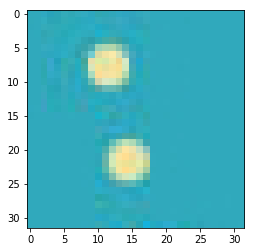

In [331]:
plt.imshow(picture)

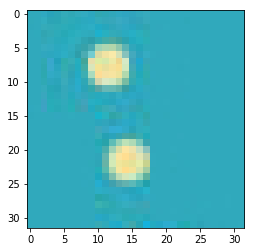

In [332]:
plt.imshow(tattoo)
#grayscale = rgb2gray(tattoo)
#tattoo=(grayscale*255).astype(np.int)

In [173]:
print(newzone)

[[[214  23  53]
  [188  18  49]
  [180  15  50]
  ...
  [214 206 204]
  [215 205 203]
  [216 209 205]]

 [[212  23  53]
  [200  20  55]
  [176  15  46]
  ...
  [214 206 200]
  [213 205 201]
  [216 207 207]]

 [[220  23  59]
  [200  18  55]
  [178  17  46]
  ...
  [214 204 202]
  [215 205 205]
  [216 207 207]]

 ...

 [[226 239 161]
  [226 234 157]
  [224 233 152]
  ...
  [174 138  65]
  [185 155  69]
  [196 174 109]]

 [[226 241 157]
  [228 242 155]
  [228 253 166]
  ...
  [174 136  61]
  [185 159  75]
  [198 178 115]]

 [[226 245 165]
  [232 130 185]
  [234 133 186]
  ...
  [178 140  61]
  [191 161  87]
  [198 180 109]]]


In [174]:
print(tattoo)

[[[0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]
  [0.18431373 0.6627451  0.75686276]
  ...
  [0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]]

 [[0.1882353  0.6627451  0.7294118 ]
  [0.1882353  0.6627451  0.7372549 ]
  [0.19607843 0.6784314  0.7490196 ]
  ...
  [0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]]

 [[0.18431373 0.65882355 0.73333335]
  [0.1882353  0.6627451  0.7372549 ]
  [0.20784314 0.67058825 0.7254902 ]
  ...
  [0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]]

 ...

 [[0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]
  ...
  [0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]]

 [[0.1882353  0.6627451  0.7372549 ]
  [0.1882353  0.6627451  0.7372549 ]
